In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats

In [71]:
df_orders = pd.read_csv("datos_ejs/olist_orders_dataset.csv")
df_customers = pd.read_csv("datos_ejs/olist_customers_dataset.csv")
df_order_items = pd.read_csv("datos_ejs/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("datos_ejs/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("datos_ejs/olist_order_reviews_dataset.csv")
df_products = pd.read_csv("datos_ejs/olist_products_dataset.csv")
df_sellers = pd.read_csv("datos_ejs/olist_sellers_dataset.csv")
df_prod_category = pd.read_csv("datos_ejs/product_category_name_translation.csv")
df_location = pd.read_csv("datos_ejs/olist_geolocation_dataset.csv")

In [72]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [73]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [74]:
df_orders_status = df_orders.groupby('order_status').agg(cantidad = ('order_status', 'count')).sort_values(by='cantidad', ascending = False)
df_orders_status

,cantidad
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [75]:
ordenes_canceladas = df_orders_status.loc['canceled','cantidad']
total_orders = len(df_orders)
print(f'El {round((ordenes_canceladas/total_orders)*100,2)} % de las ordenes fueron canceladas')

El 0.63 % de las ordenes fueron canceladas


In [76]:
df_orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [77]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [78]:
df_orders['tiempo_de_aprobacion'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']).dt.total_seconds()/60


In [79]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   tiempo_de_aprobacion           99281 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [80]:
df_orders['tiempo_de_aprobacion'].sort_values(ascending=False)

47552    270550.833333
62293     87051.983333
4541      47042.733333
4396      46861.683333
43697     46851.300000
             ...      
97696              NaN
98415              NaN
98909              NaN
99283              NaN
99347              NaN
Name: tiempo_de_aprobacion, Length: 99441, dtype: float64

In [81]:
df_orders['tiempo_de_aprobacion'].mean()

625.1456581151789

<AxesSubplot:>

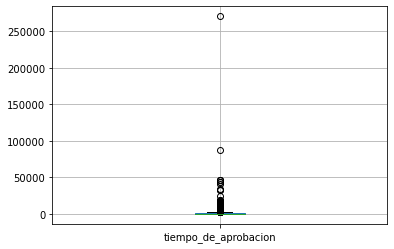

In [82]:
df_orders.boxplot(column = 'tiempo_de_aprobacion')

In [92]:
q = df_orders["tiempo_de_aprobacion"].quantile(0.99)
df_orderss = df_orders[df_orders["tiempo_de_aprobacion"] < q]

In [93]:
df_orderss['tiempo_de_aprobacion'].mean()

552.3250183135247

In [94]:
df_orders[df_orders["tiempo_de_aprobacion"] > q]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_aprobacion
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,7467.833333
150,86b37610c0e86e94afe3d5ba4b73fa14,86ff82570097f39b2193254f540e4a69,delivered,2017-11-17 21:14:42,2017-11-22 02:49:29,2017-11-22 17:37:09,2017-12-05 20:23:33,2017-12-20,6094.783333
186,5487a8ac1699754d975f853ce8bb9321,a51b373c427132a77b112ca10f502c4f,delivered,2018-03-29 14:29:44,2018-04-03 05:48:50,2018-04-04 01:13:40,2018-04-08 16:22:04,2018-04-20,6679.100000
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,7842.350000
311,4906eeadde5f70b308c20c4a8f20be02,4e7656e34357b93f14b40c6400ca3f6e,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2017-12-12 17:43:21,2018-01-09 18:04:58,2018-01-03,5705.066667
...,...,...,...,...,...,...,...,...,...
99290,017cf0b342401318dcaeb25478e13a6f,131227776a8b159a13938a0abfa95c5f,delivered,2017-12-30 02:09:39,2018-01-04 23:17:29,2018-01-09 23:16:11,2018-01-13 17:04:53,2018-02-01,8467.833333
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,7156.716667
99377,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15,5877.500000
99406,7fd85cb0143de098a4c5ab5a57bfbd91,d32034dfc685b1ae15dd4c78eace868e,delivered,2017-05-04 21:05:28,2017-05-09 22:33:28,2017-05-09 17:02:58,2017-05-18 06:34:38,2017-06-01,7288.000000


<AxesSubplot:>

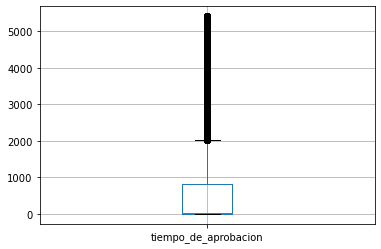

In [95]:
df_orderss.boxplot(column = 'tiempo_de_aprobacion')